# Datamodel and Database module


* [The Datamodel](#datamodel)
    * [Students Table](#studenttable)
    * [Colleges Table](#collegetable)
    * [Application Form Table](#applformtable)
* [Datamodel Implementation](#datamodelimpl)
    * [Generating Mock Data](#mockdata)
    * [Simulating Missing Data](#missingdata)
* [Saving Scraped Data](#saving)
    * [Part 1 - Student Data](#studentdata)
    * [Part 2 - Application Data](#applicationdata)
    * [Merged Data](#mergeddata)


<a id="datamodel"></a>
## The Datamodel

Based on our research of key factors ([example](http://www.nacacnet.org/studentinfo/articles/Pages/Factors-in-the-Admission-Decision.aspx)), the first thing we did was determine an appropriate datamodel in order to standardize scraping from potentially multiple sources and allow parallel development between scraping and classification. There are of course limits to pre-determining the model. We are unable to get a complete picture of a given candidate, such as recommendation letters as it is impossible to get data for this as well as being difficult quantify. We were able to find a data source for the vast majority of the factors we identified and did not discover any additional sources for factors we did not already identify. The bredth of our factors is already substantially wider than the two dimensions of Test Scores and GPA found on [Naviance](http://www.naviance.com/), the most popular current site for predicting admissions.

We distinguish three tables:
- A students table contains all academic and personal data of a particular student (scores, gender, etc)
- A college table contains all information of a university (acceptance rate, public/private, etc)
- An application form table contains application-specific data for a particular student in a particular university, for example and most importantly, the result of the decision procedure

When these three tables are merged, a single row of the merged result represents a complete college application ready for classification and analysis.

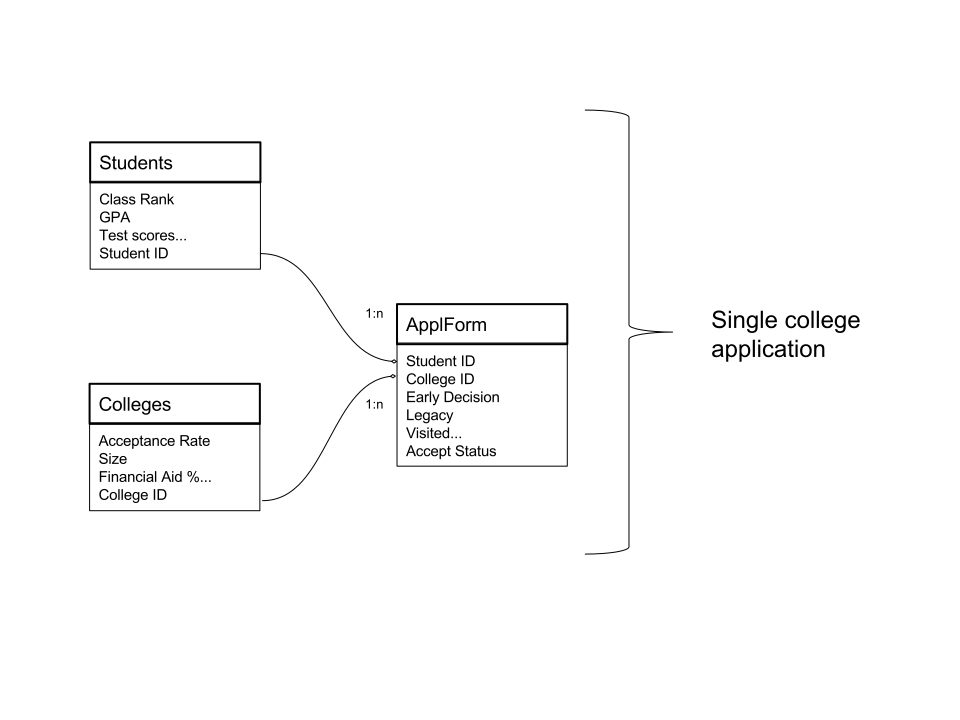

In [10]:
from IPython.display import SVG
SVG(filename='datamodel.svg')

<a id="studenttable"></a>
### The Student Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Class Rank</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>classrank</td>
      <td>percentile, or could group by "top 10%" . For ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Admissions Test</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>admissionstest</td>
      <td>This is a combination of SAT and ACT, converte...</td>
    </tr>
    <tr>
      <th>2</th>
      <td># AP/IB/Other</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>AP</td>
      <td># tests taken</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Average AP/IB score</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>averageAP</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>SAT Subject</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>SATsubject</td>
      <td># tests taken</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Can Afford Tuition</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>canAfford</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>GPA</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>GPA</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Weighted GPA</td>
      <td>Numerica</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>GPA_w</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Female</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>female</td>
      <td>-1 means male, 0 means unidentified</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Minority Gender/Sexuality</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>MinorityGender</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Minority Race</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>MinorityRace</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>11</th>
      <td>International</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>international</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>12</th>
      <td>First in Family</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>firstinfamily</td>
      <td>to go to ANY college</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Sporting Excellence</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>sports</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Music / Performing Arts Excellence</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>artist</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Which Program</td>
      <td>Factor</td>
      <td>academic</td>
      <td>n levels</td>
      <td>N</td>
      <td>program</td>
      <td>e.g. Sciences / Arts / Music / Undecided</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Work Experience</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>workexp</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Public/Private/Homeschool</td>
      <td>Factor</td>
      <td>academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>schooltype</td>
      <td>Highschool type: -1 is public, all values are ...</td>
    </tr>
    <tr>
      <th>18</th>
      <td>Intended Grad Year</td>
      <td>Numeric</td>
      <td>personal</td>
      <td>I</td>
      <td>N</td>
      <td>intendedgradyear</td>
      <td>Class of ?</td>
    </tr>
  </tbody>
</table>



<a id="collegetable"></a>
### The Colleges Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>collegeID</td>
      <td>string</td>
      <td>college</td>
      <td>string</td>
      <td>N</td>
      <td>collegeID</td>
      <td>Unique key in the database</td>
    </tr>
    <tr>
      <th>1</th>
      <td>name</td>
      <td>string</td>
      <td>college</td>
      <td>string</td>
      <td>N</td>
      <td>name</td>
      <td>Friendly name</td>
    </tr>
    <tr>
      <th>2</th>
      <td>College Acceptance Rate</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>acceptrate</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>College Size</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>size</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Public/private</td>
      <td>Indicator</td>
      <td>college</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>public</td>
      <td>-1 private / parochial, 1 is public</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Percent Student Fin Aid</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>finAirPct</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Percent In state</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>instatePct</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>


<a id="applformtable"></a>
### The Application Form Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Campus Visit / Interview</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>visited</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Early</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>earlyAppl</td>
      <td>Includes early action and early decision.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Acceptance Status</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,1}</td>
      <td>N</td>
      <td>acceptStatus</td>
      <td>did the student get in? -1 = rejected, 1= acce...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Acceptance Probability</td>
      <td>Numeric</td>
      <td>application</td>
      <td>R</td>
      <td>N</td>
      <td>acceptProb</td>
      <td>what is our forecast acceptance probability?</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Out of State</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>outofstate</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Family Alumni</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>alumni</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>


<a id="datamodelimpl"></a>
## Datamodel Implementation


The `TIdatabase.py` Python module encapsulates all loading, storing and joining of the student, college and applications dataframes.

The module is imported at the beginning of every relevant iPython Notebook.

The module provides a wrapper around a Pandas dataframe and utility functions to ensure referential integrity between the tables and loading and storing of persistent data.

The persistent storage we used was simply CSV files. This had a number of advantages:

* CSVs are easy to read, without platform or database connectivity issues.
* They are readily portable, which was key as the public website is effectively running on three different environments.
* They are compatible with Python, R and other tools such as Tableau so it was easy to import / export and perform analysis with a variety of tools.
* Since we were dealing with approximately 15,000 records, there was no need for a higher performance solution.


In [13]:
import TIdatabase as ti
%matplotlib inline 
import numpy as np
import pandas as pd


<a id="mockdata"></a>
### Generating Mock Data


The module has the functionality to fill the dataframes with mock data, which is useful to start writing  classification code before we finish scraping the actual data.

In [14]:
students = ti.Student()
# populate students with random values
students.fillRandom(10)
students.df 

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,Q8TCGVB50N,0.113385,0.399876,0.443328,0.691132,0.376951,0.040283,0.477849,UNEQHUWPSCYL,2009,...,0,0,1,1,0,1,0,1,1,0
1,PDR9C8C0WR,0.768717,0.017993,0.765662,0.366375,0.233643,0.863181,0.995056,KLOBYAUSFWHW,2010,...,1,1,0,0,1,0,1,0,0,0
2,CMKJY9E5TA,0.170250,0.273813,0.959664,0.978758,0.562538,0.780712,0.853392,LVREJZUEASOV,2017,...,0,1,1,1,1,0,1,0,1,0
3,NH18JTYK8X,0.056511,0.817200,0.872590,0.542415,0.306787,0.258844,0.321160,EIFPRHPIYCMH,2012,...,0,0,0,1,1,0,0,0,1,0
4,6QXT2PJKQG,0.880478,0.762919,0.940659,0.732898,0.359172,0.057632,0.969030,NGMCYCZPRPIV,2011,...,1,1,0,1,0,0,1,1,0,1
5,01317CHWXE,0.362504,0.379996,0.147465,0.815529,0.677483,0.171154,0.247063,VZFJNRZWKFLZ,2017,...,1,1,0,1,0,0,0,1,1,1
6,WQAZUG46MB,0.244409,0.071056,0.946347,0.461509,0.331230,0.134127,0.860337,QIGSNORCAMVU,2011,...,0,1,0,0,1,0,1,0,1,0
7,7Q1GJ77OQS,0.986537,0.589139,0.834098,0.979321,0.783744,0.278935,0.357542,UQWLYGAUMLAT,2018,...,1,1,1,1,1,1,0,0,0,1
8,0UA4J49U3M,0.581558,0.829838,0.047060,0.086737,0.890449,0.881862,0.839324,QZZBQPDVYYJH,2009,...,1,1,0,0,0,0,0,0,0,1
9,MGMU0V6BE9,0.150563,0.454575,0.997916,0.306759,0.346058,0.752673,0.649585,XSIIBYVFUYUA,2012,...,0,0,1,0,1,0,1,1,0,1


<a id="missingdata"></a>
### Simulating Missing Data

Missing data (NaNs) can be simulated to test the model's resiliancy and imputation. `fillRandom` takes a second optional parameter that is the percentage of NaNs to generate.

In [15]:
students.fillRandom(10, 0.25) # 25% of values will be NaN
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,49K0YDQWFP,0.066401,0.154934,NaN,0.204603,NaN,0.220186,0.626649,GIESKVJVXSTL,NaN,...,0,0,1,1,1,NaN,NaN,0,1,1
1,9PE1GL720P,NaN,NaN,0.587781,0.898637,NaN,0.208309,0.995993,SUQKAIPREGBQ,2009,...,1,0,0,1,NaN,1,NaN,1,1,1
2,YXFSQ64K31,0.029148,0.683409,0.694797,0.121797,0.320452,NaN,0.013344,VAIOZKHYRMCD,2020,...,NaN,NaN,0,1,NaN,NaN,1,0,1,0
3,C3I2U1XTLR,0.909168,0.239965,NaN,0.883700,0.965723,0.036915,NaN,SLEQOUMMMEVZ,2017,...,1,0,1,NaN,0,0,NaN,NaN,1,1
4,0SJXB01EXA,0.314496,0.507358,NaN,NaN,0.414684,0.648824,0.011239,UGXRGTQTNILL,2015,...,NaN,0,0,0,NaN,0,0,NaN,0,0
5,GC20Y0Z6UA,0.806391,0.044301,0.075671,NaN,0.397358,0.410075,NaN,ZKAEIIMSLHKZ,NaN,...,0,1,NaN,1,0,NaN,1,1,1,1
6,818AUZOT4I,0.672896,0.242531,0.382384,NaN,0.291682,0.888897,0.089225,AFGBHBNBGINL,2018,...,1,NaN,NaN,0,1,1,0,0,NaN,NaN
7,UZMI1H78N4,0.929899,0.652842,0.991229,0.504763,0.015102,0.815192,NaN,NaN,NaN,...,0,NaN,1,0,1,0,NaN,NaN,0,0
8,K6PYT8GE7J,0.743502,0.263167,NaN,0.262235,0.797729,NaN,0.966211,NWPCFRXUCUCF,2016,...,NaN,0,0,1,NaN,1,0,0,1,0
9,G6J2HSKQ6K,NaN,0.263839,NaN,0.769711,0.114778,NaN,NaN,RSMDNTYZXIFK,2018,...,0,0,0,NaN,1,1,1,0,0,0


Since we have a fixed list of only 25 colleges, the college infromation is not scraped.  The list of colleges is populated from a CSV stored in the same directory as this notebook. It can be edited using your favorite CSV editor, such as Excel. When you create a new instance of College, the values will be read in from the CSV. 

In [16]:
# populate with list of known colleges
colleges = ti.College()
colleges.df

,collegeID,name,acceptrate,size,public,finAidPct,instatePct
0,Princeton,Princeton,0.074,5142,-1,0.00,0
1,Harvard,Harvard,0.060,19929,-1,0.75,0
2,Yale,Yale,0.063,12336,-1,0.00,0
3,Columbia,Columbia,0.070,24221,-1,0.00,0
4,Stanford,Stanford,0.051,16795,-1,0.00,0
5,UChicago,UChicago,0.088,12558,-1,0.00,0
6,MIT,MIT,0.079,11319,-1,0.00,0
7,Duke,Duke,0.114,15856,-1,0.00,0
8,UPenn,UPenn,0.104,21296,-1,0.00,0
9,CalTech,CalTech,0.088,2209,-1,0.00,0


The table of application forms combines a student with a university and carries the information of specific applications. `acceptStatus` is our predictor. `acceptProb` is our $\hat{Y}$ probability.

In [17]:
applForm = ti.ApplForm()
applForm.fillRandom(30)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,0SJXB01EXA,Stanford,0,0,0,1,1,0.912665
1,G6J2HSKQ6K,Georgetown,0,1,1,0,1,0.346264
2,YXFSQ64K31,UChicago,1,1,1,1,0,0.981919
3,49K0YDQWFP,JohnsHopkins,0,0,1,1,1,0.001946
4,G6J2HSKQ6K,Dartmouth,0,1,1,0,1,0.516033
5,0SJXB01EXA,CarnegieMellon,1,0,0,0,1,0.000976
6,K6PYT8GE7J,Northwestern,1,0,0,0,0,0.297894
7,YXFSQ64K31,Stanford,1,0,0,1,0,0.112781
8,C3I2U1XTLR,Columbia,0,0,0,0,0,0.190281
9,49K0YDQWFP,UPenn,1,1,1,1,1,0.389757


To combine the student and application forms tables, we use Pandas merge capability, which will match rows by identical column names, which is studentID in this case:

In [18]:
applications = pd.merge(students.df,applForm.df)
applications

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,artist,workexp,schooltype,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,49K0YDQWFP,0.066401,0.154934,NaN,0.204603,NaN,0.220186,0.626649,GIESKVJVXSTL,NaN,...,0,1,1,JohnsHopkins,0,0,1,1,1,0.001946
1,49K0YDQWFP,0.066401,0.154934,NaN,0.204603,NaN,0.220186,0.626649,GIESKVJVXSTL,NaN,...,0,1,1,UPenn,1,1,1,1,1,0.389757
2,49K0YDQWFP,0.066401,0.154934,NaN,0.204603,NaN,0.220186,0.626649,GIESKVJVXSTL,NaN,...,0,1,1,USC,0,0,0,1,1,0.952640
3,49K0YDQWFP,0.066401,0.154934,NaN,0.204603,NaN,0.220186,0.626649,GIESKVJVXSTL,NaN,...,0,1,1,Vanderbilt,1,1,0,1,0,0.922825
4,9PE1GL720P,NaN,NaN,0.587781,0.898637,NaN,0.208309,0.995993,SUQKAIPREGBQ,2009,...,1,1,1,Georgetown,0,0,1,1,1,0.647154
5,9PE1GL720P,NaN,NaN,0.587781,0.898637,NaN,0.208309,0.995993,SUQKAIPREGBQ,2009,...,1,1,1,Dartmouth,1,0,1,0,0,0.946186
6,YXFSQ64K31,0.029148,0.683409,0.694797,0.121797,0.320452,NaN,0.013344,VAIOZKHYRMCD,2020,...,0,1,0,UChicago,1,1,1,1,0,0.981919
7,YXFSQ64K31,0.029148,0.683409,0.694797,0.121797,0.320452,NaN,0.013344,VAIOZKHYRMCD,2020,...,0,1,0,Stanford,1,0,0,1,0,0.112781
8,YXFSQ64K31,0.029148,0.683409,0.694797,0.121797,0.320452,NaN,0.013344,VAIOZKHYRMCD,2020,...,0,1,0,USC,1,1,0,0,1,0.766466
9,C3I2U1XTLR,0.909168,0.239965,NaN,0.883700,0.965723,0.036915,NaN,SLEQOUMMMEVZ,2017,...,NaN,1,1,Columbia,0,0,0,0,0,0.190281


Now the `applications` Pandas DataFrame is ready to use for either regression (by overwriting the acceptProb column) or building the public facing web site.

<a id="saving"></a>
## Saving Scraped Data

<a id="studentdata"></a>
### Part 1 - The Student Data

First, let's start fresh and delete the previously created objects. This is only necessary because this sample script is running within Jupyter where all variables are global to the page. In a separate Python file run from the command line, this step can be skipped. Creating a new instance would not work as behind the scenes, there is sharing of
DataFrames between objects.

In [19]:
if ('students' in locals()): 
    students.cleanup()
    del students
if ('applications' in locals()): del applications
if ('applForm' in locals()): del applForm


Let's create a new students instance. It will be an empty Pandas dataframe with the correct columns

In [20]:
students = ti.Student()
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype


Populate a dictionary with the values that the scraper has for a given row. Make sure the keys match up with the column names as only the matching columns will be saved. There is no need to add the studentID key. A unique value will be generated automatically and returned from the insert. This will be in the same order as the provided rows. Saving the generated student IDs will be helpful later when populating the applForm foreign key.

In [21]:

# Example: international male who scored in 98th percentile in ACT/SAT, went to a public school and is applying for
# Class of 2020

newrow = {'admissionstest': 0.98,
         'GPA': 4.5,
         'female' : -1,
         'international': 1,
         'schooltype': -1,
         'intendedgradyear':2020}

newsinglestudentID = students.insert(newrow)
print "New studentID:",newsinglestudentID
students.df

New studentID: ['JSINAQNI34']


,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,JSINAQNI34,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1


It is more efficient if multiple rows are added in one step. In this case, create a list of dictionaries and just
use the same method. Here, two new rows are added to the DataFrame in one step.

In [22]:
rows = []
a = {'schooltype': -1, 'admissionstest': 0.98, 'GPA': 4.5, 'female': 1, 'intendedgradyear': 2019, 'international': 0}
rows.append(a)
a = {'schooltype': 1, 'admissionstest': 0.65, 'GPA': 2.2, 'female': -1, 'intendedgradyear': 2019, 'international': 0}
rows.append(a)
newmanystudentIDs = students.insert(rows)
print "New studentIDs:",newmanystudentIDs
students.df

New studentIDs: ['WWJRHGRUPB', '1AP78QP7KL']


,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,JSINAQNI34,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1
0,WWJRHGRUPB,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,-1
1,1AP78QP7KL,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,1


Now we are ready to save. The data is saved in CSV format for ease of interpretability.

In [23]:
students.save("mydata.csv")

Let's delete all the data and check that we can read it back successfully.

In [24]:
if ('students' in locals()): 
    students.cleanup()
    del students
if ('applications' in locals()): del applications
if ('applForm' in locals()): del applForm



In [25]:
students = ti.Student()
students.read("mydata.csv")
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,JSINAQNI34,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1
0,WWJRHGRUPB,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,-1
1,1AP78QP7KL,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,1


Et, voilà, the data is back.

<a id="applicationdata"></a>
### Part 2 - The Application Data

This is pretty much the same, **except** for two important differences:

* The studentID and collegeID must both be populated and exist in the respective DataFrames
* The columns are a little different. Normally acceptProb would not be populated from the scraper but could be used to store prediction runs. 

In [26]:
# we already wiped out applForm above
applForm = ti.ApplForm()
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb


In [27]:
# either pick one from the students.df DataFrame, like this:
#--- studentID = students.df.iloc[1].studentID
# or use the studentID from the insert in the students DataFrame
studentID = newsinglestudentID[0]
collegeID = colleges.df.iloc[1].collegeID

In [28]:
print studentID, collegeID

JSINAQNI34 Harvard


In [29]:
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 0,
         'visited': 0,
         'acceptStatus': 0}

applForm.insert(newrow)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,JSINAQNI34,Harvard,0,0,NaN,NaN,0,NaN


Now inserting multiple rows

In [30]:
rows = []
# either pick one randomly:
#--- studentID = students.df.iloc[2].studentID
# or use the list from the insert into the students DataFrame
# iterate over the list of newstudentIDs if necessary
studentID = newmanystudentIDs[0]
collegeID = colleges.df.iloc[2].collegeID
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 0,
         'visited': 0,
         'acceptStatus': 0}
rows.append(newrow)
# note: same student, new school to apply to
studentID = students.df.iloc[2].studentID
collegeID = colleges.df.iloc[3].collegeID
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 1,
         'visited': 1,
         'acceptStatus': 1}
rows.append(newrow)
applForm.insert(rows)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,JSINAQNI34,Harvard,0,0,NaN,NaN,0,NaN
0,WWJRHGRUPB,Yale,0,0,NaN,NaN,0,NaN
1,1AP78QP7KL,Columbia,1,1,NaN,NaN,1,NaN


Let's save it

In [31]:
applForm.save("applform1.csv")

Then delete the local variable

In [32]:
if ('applForm' in locals()): del applForm

Then read it back

In [33]:
applForm = ti.ApplForm()
applForm.read("applform1.csv")
applForm.df


,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,JSINAQNI34,Harvard,0,0,NaN,NaN,0,NaN
0,WWJRHGRUPB,Yale,0,0,NaN,NaN,0,NaN
1,1AP78QP7KL,Columbia,1,1,NaN,NaN,1,NaN


<a id="mergeddata"></a>

### Merging The Tables

And now let's check that the merge still works

In [34]:
applications = pd.merge(students.df,applForm.df)
applications

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,artist,workexp,schooltype,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,JSINAQNI34,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,NaN,-1,Harvard,0,0,NaN,NaN,0,NaN
1,WWJRHGRUPB,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,NaN,-1,Yale,0,0,NaN,NaN,0,NaN
2,1AP78QP7KL,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,NaN,1,Columbia,1,1,NaN,NaN,1,NaN


Now that the datamodel is implemented, the next step is to populate it with scraped data. 